In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DATA PREPROCESSING**

In [40]:
# importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [41]:
# Loading the Dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)

In [42]:
data.head(10)

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
5,+,MALEFG,\taggggcaaggaggatggaaagaggttgccgtataaagaaactag...
6,+,MALK,\t\tcagggggtggaggatttaagccatctcctgatgacgcatagt...
7,+,RECA,\t\ttttctacaaaacacttgatactgtatgagcatacagtataat...
8,+,RPOB,\t\tcgacttaatatactgcgacaggacgtccgttctgtgtaaatc...
9,+,RRNAB_P1,\tttttaaatttcctcttgtcaggccggaataactccctataatgc...


In [43]:
data.shape

(106, 3)

In [44]:
data.dtypes

Class       object
id          object
Sequence    object
dtype: object

REFINING AND STRUCTURING THE DATA

In [45]:
# Dropping Unnecessary Columns

classes = data.loc[:,'Class']
print(classes.value_counts())

+    53
-    53
Name: Class, dtype: int64


In [46]:
# generate list of DNA sequence

sequence = list(data.loc[:, 'Sequence'])
sequence[-1]

'\t\ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaact'

In [47]:
#Remove tab from each sequence

dic = {}
for i, seq in enumerate(sequence):
    nucleotides = list(seq)
    nucleotides = [char for char in nucleotides if char != '\t']
    
    #append class assignment
    nucleotides.append(classes[i])
    
    dic[i] = nucleotides
list(dic[0])

['t',
 'a',
 'c',
 't',
 'a',
 'g',
 'c',
 'a',
 'a',
 't',
 'a',
 'c',
 'g',
 'c',
 't',
 't',
 'g',
 'c',
 'g',
 't',
 't',
 'c',
 'g',
 'g',
 't',
 'g',
 'g',
 't',
 't',
 'a',
 'a',
 'g',
 't',
 'a',
 't',
 'g',
 't',
 'a',
 't',
 'a',
 'a',
 't',
 'g',
 'c',
 'g',
 'c',
 'g',
 'g',
 'g',
 'c',
 't',
 't',
 'g',
 't',
 'c',
 'g',
 't',
 '+']

In [48]:
# Convert Dict object into dataframe
df = pd.DataFrame(dic)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a


In [49]:
# transpose dataframe into correct format

df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [50]:
# Rename the 57th column as it is our classes

df.rename(columns = {57:'Class'}, inplace = True)

In [51]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [52]:
temp = df.copy(deep=True)
temp = temp.drop(['Class'], axis = 1)

temp.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,t,a,c,t,a,g,c,a,a,t,...,g,g,c,t,t,g,t,c,g,t
1,t,g,c,t,a,t,c,c,t,g,...,g,c,a,t,c,g,c,c,a,a
2,g,t,a,c,t,a,g,a,g,a,...,c,c,a,c,c,c,g,g,c,g
3,a,a,t,t,g,t,g,a,t,g,...,t,a,a,c,a,a,a,c,t,c
4,t,c,g,a,t,a,a,t,t,a,...,t,c,c,g,t,g,g,t,a,g


ONE-HOT ENCODING

In [53]:
# Encoding using one-hot encoder:

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(temp)
print(enc.categories_)
df1 = enc.transform(temp).toarray()
del temp

[array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a'

In [54]:
# Saving the one-hot encoder

with open("drive/MyDrive/Dataset/Models/EColi-encoder.pickle", "wb") as f: 
    pickle.dump(enc, f)

# Loading the file later:
# encoder = pickle.load(f) 
# data = encoder.transform(df).toarray()

In [55]:
df_new = pd.DataFrame(df1)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
# Fixing the classes column:

df["Class"] = df["Class"].replace(to_replace =["+"], value =1)
df["Class"] = df["Class"].replace(to_replace =["-"], value =0)
df_new["Classes"] = df['Class']
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,Classes
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


**MODEL ARCHITECTURE**

TRAIN AND TEST SETS

In [57]:
y = df_new['Classes'].values
x = df_new.drop(['Classes'], axis = 1).values

#define a seed for reproducibility
seed = 1

# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = seed)

BUILDING THE MLP CLASSIFIER

In [60]:
model = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))

1.0


**MODEL EVALUATION**

In [62]:
# accuracy score

y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9259259259259259

In [64]:
# classification report

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



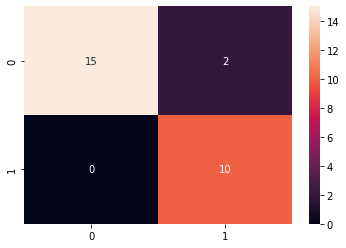

In [65]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [66]:
# Jaccard Index

from sklearn.metrics import jaccard_score
jaccard_index = jaccard_score(y_test, y_pred)
print("The Jaccard Index is:", jaccard_index)

The Jaccard Index is: 0.8333333333333334


In [67]:
# Mathews Correlation Coefficient

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print("The matthews correlation coefficient is:", mcc)

The matthews correlation coefficient is: 0.8574929257125441


In [68]:
# Dice Coefficient

import tensorflow as tf

def dice_coef(y_test, y_pred):
    y_test_f = tf.reshape(tf.dtypes.cast(y_test, tf.float32), [-1])
    y_pred_f = tf.reshape(tf.dtypes.cast(y_pred, tf.float32), [-1])
    intersection = tf.reduce_sum(y_test_f * y_pred_f)
    return (2. * intersection + 1.) / (tf.reduce_sum(y_test_f) + tf.reduce_sum(y_pred_f) + 1)

dice = dice_coef(y_test, y_pred)
print("Dice Coefficient: {:.3f}".format(dice))

Dice Coefficient: 0.913


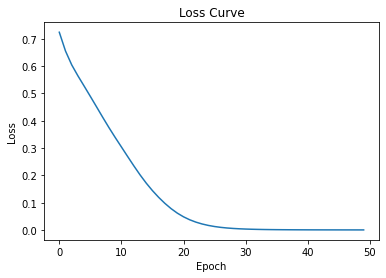

In [69]:
# Loss Curve

plt.plot(model.loss_curve_)
plt.title("Loss Curve"); plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.show()

In [70]:
# save the model to disk

filename = 'drive/MyDrive/Dataset/Models/E-Coli_model.pickle'
pickle.dump(model, open(filename, 'wb'))

**RESULTS**

In [71]:
# Checking For E. coli(True Case)

genome = "ttactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcg"
genome_list = list(genome)
print(genome_list)
df_test = pd.DataFrame(genome_list)
df_test = df_test.transpose()

['t', 't', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g']


In [72]:
encoder = pickle.load(open("drive/MyDrive/Dataset/Models/EColi-encoder.pickle", 'rb')) 
data_test = encoder.transform(df_test).toarray()
print(model.predict(data_test))

[1]


In [73]:
# Checking For E. coli(FALSE Case)

genome = "ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaac"
genome_list = list(genome)
print(genome_list)
df_test = pd.DataFrame(genome_list)
df_test = df_test.transpose()

['t', 't', 'a', 'a', 'c', 'a', 't', 't', 'a', 'a', 't', 'a', 'a', 'a', 't', 'a', 'a', 'g', 'g', 'a', 'g', 'g', 'c', 't', 'c', 't', 'a', 'a', 't', 'g', 'g', 'c', 'a', 'c', 't', 'c', 'a', 't', 't', 'a', 'g', 'c', 'c', 'a', 'a', 't', 'c', 'a', 'a', 't', 'c', 'a', 'a', 'g', 'a', 'a', 'c']


In [74]:
encoder = pickle.load(open("drive/MyDrive/Dataset/Models/EColi-encoder.pickle", 'rb')) 
data_test = encoder.transform(df_test).toarray()
print(model.predict(data_test))

[0]
